In [116]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.rc('font', family='D2Coding')
plt.rcParams["axes.unicode_minus"] = False

In [117]:
# pd.read_csv('./data/adult.data', header=None, index_col=False)

#index=false 컬럼을 안쓴다는 것으로 인덱스 쪽에도 아무것도 안붙일 거야 라는 뜻.
#csv 형태는 무조건 Head를 첫줄로 인식하기 때문에, 안쓴다고 선언하면, 컬럼에 숫자가 자동으로 붙음
# csv로 바꾸기 전에 반드시 헤드 확인하고, 헤드는 띄어쓰기를 안하기 때문에 띄어쓰기 확인하고 저장 후 바꿔야 함.!! 중요!!!

# SELECT * INTO [new_table_name] FROM [ofiginal_table_name];
# 이 데이터는 내꺼. 컬럼명 다 정제된 것을 써야함. 예쁘게 to_CSV 파일로 뽑아서 대체해라.



In [118]:
df = pd.read_csv("data/adult.csv", index_col=False)
df.to_csv("temp.csv", index=False) # csv 저장시 앞에 자동으로 들어가는 index 숫자 없애줌

In [119]:
# age, workclass, education, gender, hours-per-week, occupation, income
# data = df[["age", "workclass", "education", "gender", "hours-per-week", 'occupation', "income"]]

# data = {} # 딕셔너리
# data = [] # 리스트

# 배열 = 하나의 자료형으로 구성된 크기가 정해진 연속 자료
# 리스트 => 배열과 동일하나 다양한 데이터 타입의 자료를 담을 수 있음 

# 배열 - 리스트 공통점 : index는 숫자만 가능 / index는 손댈 수 없음

# 딕셔너리 - index(Key)를 문자열로 사용할 수 있음 /

In [120]:
# data[["gender"]].value_counts()

In [121]:
# pd.get_dummies(data) # 원핫인코딩(희소행렬) => 잘 됨, 읽기 좋음 

## Q1. Income을 예측하는 간단한 모델을 작성하시오.

* 이진 분류 모델
    * 

In [122]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   gender          32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [123]:
# 1. income을 분류할 것인데, 어떤 분류 모델을 사용할 것인가?
# 결정트리는 전처리를 안해도 됨 => 마음 속에서 지워라.
# 가장 까다로운 애를 먼저 생각해라 => 선형OO을 생각해라

# 2. 답안을 생각해라.
# income을 먼저 확인

df[["income"]].value_counts()

# 비율이 안맞음/ 섞을 때 조심해서 섞어야 함.
# 컬럼 상태를 보니 답안이 2개로 이진 분류를 선택해야 함.
# 전처리 관심없고 이대로 데이터를 쓸거다.

income
<=50K     24720
>50K       7841
Name: count, dtype: int64

In [124]:
# 현재 데이터가 어떻게 돼 있는지 확인하라.
df.isnull().sum()

# 빈 데이터가 없는 확실한 데이터 임으로 그대로 간다.

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
gender            0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

## 1. X, y(학습데이터와 정답지를 나눔)

In [125]:
# X

# 이 컬럼 전체에 적용할 것이다. 무엇을 적용할 것이냐면 무기명 함수를 적용할 것이다.
# 이 이름이 없는 함수에 변수 x로 선언하고 그 x가 if문을 만족하면 return으로 1로 바꿀거다. 
# apply가 람다식을 부르고 income의 요소 하나를  x의 인자로 계속 받아서 내부 순환하며 변환 함. 

X = df.drop("income", axis=1) 
y = df["income"].apply(lambda x: 1 if x.strip() == "<=50K" else 0)
y.value_counts()

income
1    24720
0     7841
Name: count, dtype: int64

## 2. 데이터를 split 하세요

In [126]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)

## 3. 수치형 데이터와 범주형 데이터를 분류

In [127]:
numeric_feat = ["age", "fnlwgt", "education-num", "capital-gain", "capital-loss", "hours-per-week"]
categorical_feat = ["workclass", "education", "marital-status", "occupation", "relationship", "race", "gender", "native-country"]

In [128]:
# 수치형 
# 사이키 런을 통해 데이터를 한방에 변환
from sklearn.impute import SimpleImputer

numeric_transformer = SimpleImputer(strategy="median") # median 값으로 변환 # 판다스 안쓰고 빠르게 보고 싶을 때/ 전처리 어떡하지? 없어? 중위값을 넣어 줄게
X_train_numeric = numeric_transformer.fit_transform(X_train[numeric_feat]) # 키값을 넣어서 자동으로 변환.
X_test_numeric = numeric_transformer.transform(X_test[numeric_feat]) # 모델 학습한 데이터를 기준으로 변경만 함.

In [129]:
# 수치형
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_numeric)
X_test_scaled = scaler.transform(X_test_numeric)

In [130]:
# 범주형 

from sklearn.impute import SimpleImputer

categorical_transformer = SimpleImputer(strategy="constant", fill_value="missing") # 파라미터의 짝꿍
X_train_categorical = categorical_transformer.fit_transform(X_train[categorical_feat]) # 키값을 넣어서 자동으로 변환.
X_test_categorical = categorical_transformer.transform(X_test[categorical_feat]) # 모델 학습한 데이터를 기준으로 변경만 함.

In [131]:
# 범주형
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(handle_unknown='ignore')
# handle_unknown : 내가 처음 보는 경우의 데이터 => ignore 우선은 무시해

X_train_encoder = encoder.fit_transform(X_train_categorical)
X_test_encoder = encoder.transform(X_test_categorical)

In [132]:
# 합치려면?

X_train_processed = np.hstack((X_train_scaled, X_train_encoder.toarray()))
X_test_processed = np.hstack((X_test_scaled, X_test_encoder.toarray()))

In [133]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=42)

model.fit(X_train_processed, y_train)

RandomForestClassifier(random_state=42)

In [134]:
print(X_train_processed.shape)
print(X_test_processed.shape)
print(len(y_train), len(y_test))

(24420, 108)
(8141, 108)
24420 8141


In [135]:
from sklearn.metrics import accuracy_score
y_pred = model.predict(X_test_processed)
accuracy_score(y_test, y_pred)

0.8582483724358186

In [136]:
# 판다스를 안쓰고 np를 쓰면 이렇게 됨.
feat_names = (numeric_feat + encoder.get_feature_names_out(categorical_feat).tolist())
feat_imp = model.feature_importances_
sorted_idx = np.argsort(feat_imp)[::-1]
for i in sorted_idx[:10]:
    if i < len(feat_names):
        print(f"{feat_names[i]}: {feat_imp[i]}")

fnlwgt: 0.15864765938664077
age: 0.15043472284940973
capital-gain: 0.09330510652579395
hours-per-week: 0.0832840384161689
education-num: 0.06566609435350712
marital-status_ Married-civ-spouse: 0.0640770968963756
relationship_ Husband: 0.036051065322825156
capital-loss: 0.02836344749182758
marital-status_ Never-married: 0.02228837083732449
occupation_ Exec-managerial: 0.019010781995929205


## Q6. 모델 향상 및 다른 모델 비교

# 다항식 예제

In [137]:
import mglearn
import mglearn.datasets
import numpy as np
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

X, y = mglearn.datasets.make_wave(n_samples=128)
line = np.linspace(-3, 3, 1000, endpoint=True).reshape(-1, 1)

# np.arange()와 np.linspace() 둘 중 반환값이 동일하면 np.linespace() tkdydgktpdy.
# numpy 매뉴얼에서 linspace 권장장

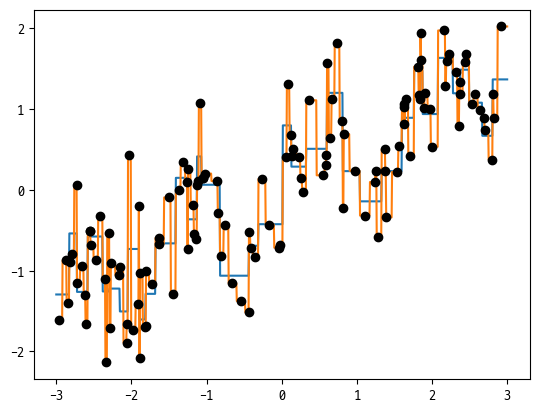

In [138]:
reg = DecisionTreeRegressor(min_samples_leaf=3).fit(X, y)
plt.plot(line, reg.predict(line), label="결정트리")
reg = DecisionTreeRegressor().fit(X, y)

plt.plot(line, reg.predict(line), label="선형회귀")
plt.plot(X[:, 0], y, 'o', c='k')

In [139]:
from sklearn.preprocessing import KBinsDiscretizer

# 10개 구간으로 나눔
kb = KBinsDiscretizer(n_bins=10, strategy="uniform", encode='onehot-dense')
kb.fit(X)

KBinsDiscretizer(encode='onehot-dense', n_bins=10, strategy='uniform')

In [140]:
X_binned = kb.transform(X)
X_binned
line_binned = kb.transform(line)

In [141]:
X_combined = np.hstack([X, X_binned])
X_combined.shape

line_combined = np.hstack([line, line_binned])
# X_product = np.hstack[[X_binned, X*X_binned]]

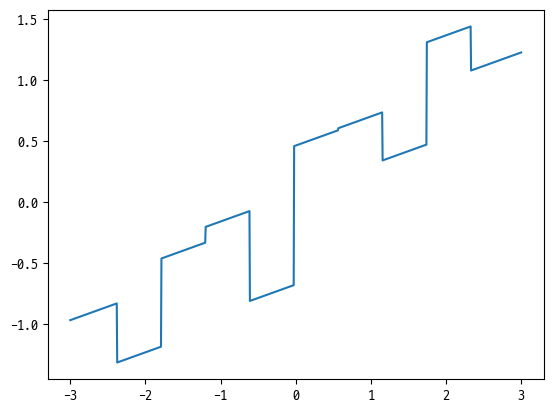

In [142]:
reg = LinearRegression().fit(X_combined, y)
plt.plot(line, reg.predict(line_combined), label="선형회귀")

In [143]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=10, include_bias=False) # 10차까지 차수를 튀긴다. / bias 절편은 없다.
poly.fit(X)
X_poly = poly.transform(X)

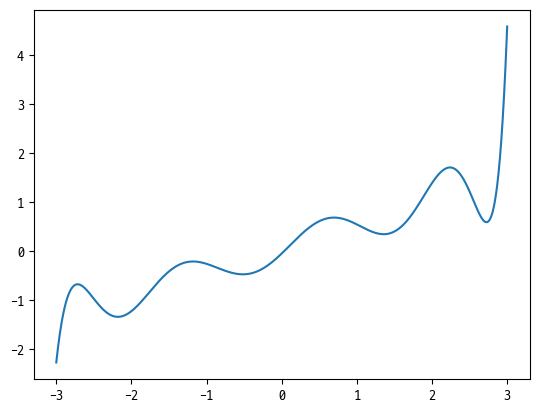

In [144]:
reg = LinearRegression().fit(X_poly, y)
line_poly = poly.transform(line)
plt.plot(line, reg.predict(line_poly), label="선형회귀")

# 4.7 특성 자동 선택

In [145]:
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import SelectPercentile, f_classif, SelectFromModel
from sklearn.model_selection import train_test_split

# f_classif : 분류에 사용

In [146]:
cancer = load_breast_cancer()

In [147]:
rng = np.random.RandomState(42) # 난수열의 첫번째 값을 정하는 것.
noise = rng.normal(size=(len(cancer.data), 50)) # 노이즈가 너무 많으면 특성이 죽고, 노이즈가 너무 없으면 특성 발현이 안됨 / 보통 1:2를 넘지 않음/ 특성이 30이니 2배인 60보다 적게 넣는다.
X_w_noise = np.hstack([cancer.data, noise])

In [148]:
X_train, X_test, y_train, y_test = train_test_split(X_w_noise, cancer.target, random_state=42, test_size=0.5)

In [149]:
select = SelectPercentile(score_func=f_classif, percentile=50)
select.fit(X_train, y_train)
X_train_selected = select.transform(X_train)

In [150]:
X_train_selected.shape
# 이 40개가 노이즈와 진짜 특성의 비율을 알 수 없다.

(284, 40)

([<matplotlib.axis.YTick at 0x212854d1820>], [Text(0, 0, '0')])

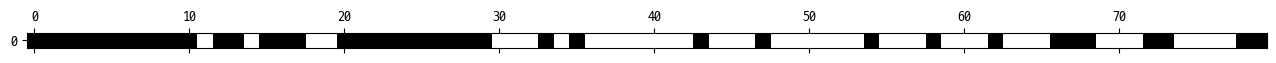

In [151]:
mask = select.get_support()
plt.matshow(mask.reshape(1, -1), cmap="gray_r")
plt.yticks([0])

In [152]:
from sklearn.linear_model import LogisticRegression

X_test_selected = select.transform(X_test)

lr=LogisticRegression(max_iter=5000)
lr.fit(X_train, y_train)
print(lr.score(X_test, y_test))
lr.fit(X_train_selected, y_train)
print(lr.score(X_test_selected, y_test))

0.9614035087719298
0.9649122807017544


# 4.7.2 모델기반 특성 선택

In [155]:
from sklearn.ensemble import RandomForestClassifier
select = SelectFromModel(
    RandomForestClassifier(n_estimators=100, random_state=42),
    threshold="median"
)


In [158]:
select.fit(X_train, y_train)
X_train_selected = select.transform(X_train)
X_test_selected = select.transform(X_test)

In [154]:
lr=LogisticRegression(max_iter=5000)
lr.fit(X_train, y_train)
print(lr.score(X_test, y_test))
lr.fit(X_train_selected, y_train)
print(lr.score(X_test_selected, y_test))

0.9614035087719298
0.9543859649122807
